<a href="https://colab.research.google.com/github/kiyong21c/nadocoding/blob/master/20220311_multi_linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [35]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# 선형회귀(Linear Regression)
https://colab.research.google.com/notebooks/intro.ipynb#scrollTo=SNcckOe_M-Rz

In [36]:
from sklearn.linear_model import LinearRegression # 머신러닝 라이브러리

# line_fitter = LinearRegression() # 모델생성
# line_fitter.fit(X, y) # X, y 데이터 학습
# 기울기 : line_fitter.coef_
# 절편 : line_fitter.intercept_
# y_predicted = line_fitter.predict(X) # 새로운 X값으로 y값을 예측
# loss가 최소(기울기가 최소)인 b값이 나올때 까지 얼마나 반복 : num_iterations
# 얼마나 꼼꼼히 학습할지 : learning_rate
# 사이킷런의 단순선형회귀에서는 [최소제곱법] 사용 : num_iteration, learning_rate 필요하지 않음

In [37]:
from sklearn.linear_model import LinearRegression # 머신러닝 라이브러리
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/student_info.csv')
df

,no,gender,weight_kg,height_cm
0,1,m,98,198
1,2,m,77,170
2,3,m,70,170
3,4,m,90,198
4,5,m,71,170
...,...,...,...,...
85,88,f,100,190
86,89,f,54,163
87,90,f,57,161
88,91,f,101,198


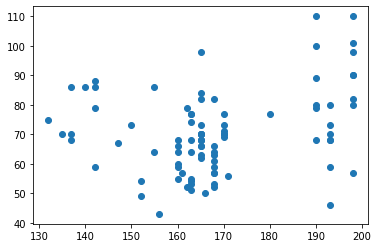

In [38]:
X = df['height_cm']
y = df['weight_kg']
plt.plot(X, y, 'o')
plt.show()

In [39]:
X.values

array([198, 170, 170, 198, 170, 165, 193, 142, 137, 155, 165, 147, 170,
       140, 165, 132, 137, 165, 165, 180, 168, 142, 193, 165, 142, 165,
       137, 165, 160, 160, 165, 165, 165, 163, 170, 165, 155, 165, 165,
       160, 163, 135, 165, 142, 193, 171, 162, 198, 190, 163, 150, 168,
       168, 193, 170, 163, 198, 190, 163, 160, 168, 168, 193, 160, 162,
       198, 190, 163, 166, 168, 168, 193, 152, 163, 156, 168, 168, 193,
       160, 152, 198, 190, 163, 168, 198, 190, 163, 161, 198, 190])

In [40]:
print(X.values.shape) # (90, )
print(X.values.ndim) # 1차원
print(y.values.shape) # 1차원

(90,)
1
(90,)


In [41]:
X.values.reshape(-1,1) # 2차원 배열로 변환
print(X.values.reshape(-1,1).shape)

(90, 1)


In [42]:
line_fitter = LinearRegression() # 선형회귀모델 생성
line_fitter.fit(X.values.reshape(-1,1), y) # 모델 학습

LinearRegression()

In [43]:
line_fitter.predict([[170]]) # 키가 170인 사람을 예측해보면 → 70.8526...

array([70.8526996])

In [44]:
line_fitter.coef_ # 기울기

array([0.2246605])

In [45]:
line_fitter.intercept_ # 절편

32.66041436237762

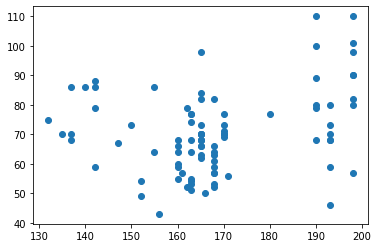

In [46]:
plt.plot(X, y, 'o')
plt.show()

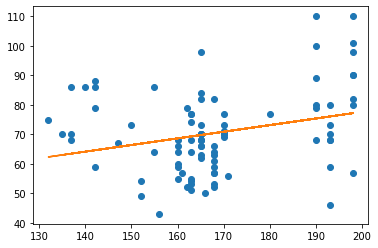

In [47]:
plt.plot(X, y, 'o')
plt.plot(X, line_fitter.predict(X.values.reshape(-1,1))) # 기존X값으로 y를 예측하게 한 그래프
plt.show()

# 다중선형회귀(Multiple Linear Regression)
 > - 몸무게를 예측하는데 필요한 변수가 X하나만은 아닐 것
 > - 여러가지의 변수 X를 고려하는것이 다중선형 회귀

Y = b + m1x1 + m2x2 + ... 

x변수 두개가 넘어가면 인간의 인지능력으로 시각화 불가능

In [48]:
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/manhattan.csv.txt')
df.head() # rent: 임대료를 예측하는것이 목표

,rental_id,rent,bedrooms,bathrooms,size_sqft,min_to_subway,floor,building_age_yrs,no_fee,has_roofdeck,has_washer_dryer,has_doorman,has_elevator,has_dishwasher,has_patio,has_gym,neighborhood,borough
0,1545,2550,0.0,1,480,9,2.0,17,1,1,0,0,1,1,0,1,Upper East Side,Manhattan
1,2472,11500,2.0,2,2000,4,1.0,96,0,0,0,0,0,0,0,0,Greenwich Village,Manhattan
2,2919,4500,1.0,1,916,2,51.0,29,0,1,0,1,1,1,0,0,Midtown,Manhattan
3,2790,4795,1.0,1,975,3,8.0,31,0,0,0,1,1,1,0,1,Greenwich Village,Manhattan
4,3946,17500,2.0,2,4800,3,4.0,136,0,0,0,1,1,1,0,1,Soho,Manhattan


In [49]:
df.columns # 임대료에 영향을 미칠것 같은 X 변수들

Index(['rental_id', 'rent', 'bedrooms', 'bathrooms', 'size_sqft',
       'min_to_subway', 'floor', 'building_age_yrs', 'no_fee', 'has_roofdeck',
       'has_washer_dryer', 'has_doorman', 'has_elevator', 'has_dishwasher',
       'has_patio', 'has_gym', 'neighborhood', 'borough'],
      dtype='object')

### 데이터 세트 분리하기(Traning & Test)

가지고 있는 데이터를 모두 사용해서 다중선형회귀 모델을 만들수 있지만 생성한 모델이 잘 예측하는지 테스트 해보기 위해 학습(train) 데이터와 시험(test)데이터를 분리한다.

(모든 데이터에 주택 임대료"rent" 정답이 있으니, 시험 데이터를 예측 모델에 넣어서 실제 정답을 잘 맞추는지 보자)

In [59]:
from sklearn.model_selection import train_test_split

x = df[['bedrooms', 'bathrooms', 'size_sqft',
       'min_to_subway', 'floor', 'building_age_yrs', 'no_fee', 'has_roofdeck',
       'has_washer_dryer', 'has_doorman', 'has_elevator', 'has_dishwasher',
       'has_patio', 'has_gym']] # 14가지 변수 고려
y = df['rent'] # y가 찾고자하는 목표이며, label과 같다
# y = df[['rent']] # 2차원으로 해도 됨(predict도 같은 2차원으로 나옴)

print(x.shape)
print(y.shape)

x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, test_size=0.2)
# 데이터 세트 분리할때는 DataFrame으로 해도 되지만, 학습 및 예측시에는 values 사용해야 오류안남

(3539, 14)
(3539,)


### 모델 생성(학습데이터를 사용)

In [65]:
from sklearn.linear_model import LinearRegression

mlr = LinearRegression() # 모델생성(선형회귀와 같다, 변수만 늘어날뿐)
mlr.fit(x_train.values, y_train.values) # DataFrame 형태로 학습하면 오류남(values사용 해야함)

LinearRegression()

In [68]:
my_apartment = [[1, 1, 620, 16, 1, 98, 1, 0, 1, 0, 0, 1, 1, 0]] # 14개 항목값을 임의로 넣어주면 
my_predict = mlr.predict(my_apartment) # 결과값을 예측해줌
my_predict


array([2311.59914273])

In [73]:
y_predict = mlr.predict(x_test.values)
y_predict

array([ 3516.92418733, 12665.35971325,  6575.74086575,  2820.91970291,
        5278.56312845,  3217.1048757 ,  5938.72646212,  2968.20724521,
        3813.62751803,  3662.57733883,  3441.00871947,  3503.16031332,
        3226.35321439,  3914.51296097,  2896.54555375,  4960.17347941,
       11186.89253561,  7325.38565629,  2570.53821785,  3253.34156481,
        3636.47556376,  3791.82001698,  3281.85196741,  2539.29894356,
        6915.93747643,  4229.26882471,  3808.28842756,  3645.44229767,
       14592.68613912,  7058.1065674 ,  5191.2845868 ,  4753.09907415,
        6403.15817371,  5862.45807864,  2799.16440245,  3154.4102654 ,
        2865.71588539,  9211.77528752,  2753.94250292,  8203.74444238,
        6163.21959289,  7945.62320749,  3409.68519766,  8152.2784134 ,
        3772.23888965,  3243.57970867,  3875.45114589,  7981.79062419,
       10156.47551094,  2991.8103679 , 11930.08106422,  3330.45254186,
        2863.86814518,  3678.85775491,  8847.35508435,  2146.55644465,
      

x축은 실제 임대로, y축은 예측한 임대료로 해서 정답을 맞춘다면 정확히 선으로 일치되어 나올것

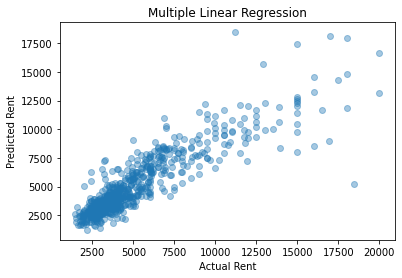

In [75]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_predict, alpha=0.4)
plt.xlabel("Actual Rent")
plt.ylabel("Predicted Rent")
plt.title("Multiple Linear Regression")
plt.show()

단순선형회귀는 1차방정식 y= mx + b로 설명되지만

다중회귀는 y = b + m1x1 + m2x2 + ...

다중회귀변수는 변수가 많고, 모든 변수 x마다 각각의 m이 존재

이러한 각각의 m을 회귀계수라고 하며,

b는 상수고 한다.

In [76]:
print(mlr.coef_) # 각각의 회귀계수들 즉 m1, m2, ... 확인할 수 있다

[-327.15743296 1170.28615703    4.90173178  -16.32492983   25.75951414
   -7.04885734 -114.990299     51.82933105  161.14410865 -127.45806172
   92.3883665   -97.97750564 -156.70833726  -35.75218468]


### 14개의 변수중 어떤 변수가 중요할까?(=주택임대료에 큰 영향을 줄까?)

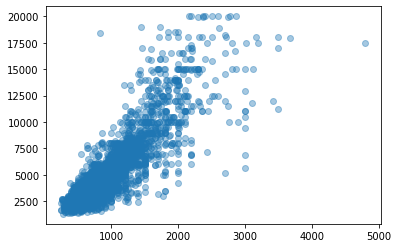

In [77]:
# 주택 면적 'size_sqft'와 가격 'rent' 관계
plt.scatter(df['size_sqft'], df['rent'], alpha=0.4)
plt.show() # 선형적 관계로 보아 중요한 변수인듯

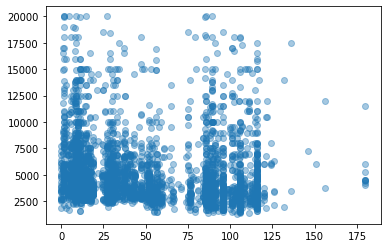

In [78]:
# 주택 연식 'building_age_yrs'와 가격 'rent' 관계
plt.scatter(df['building_age_yrs'], df['rent'], alpha=0.4)
plt.show() # 선형적이지 않아 상관관계 없어 보임

### 모델의 정확도(Accuracy) 평가
.scor() 메서드 사용하면 R^2라고하는 결정계수를 반환

예를들어, 주택사이즈("size_sqft")와 침실개수("bedrooms")를 기준으로 임대료를 예측하는 모델의 R^2이 0.72인경우

2개의 변수들이 함께 임대료 변동의 72%를 설명한다는 뜻

최선의 R^2은 1이겠지만, 일반적으로 0.7 정도면 양호한 것으로 간주

In [81]:
print(mlr.score(x_train.values, y_train.values)) # 14개의 변수를 넣고 생성한 모델의 결정계수

0.7760027751170948


주택 임대료의 77%를 위의 14개의 항목으로 설명할 수 있다는 의미